The similarity of the sign-pattern between each row or column in the covariance matrix are difference in a random matrix, however the similarity of the sign-pattern is well (Still not identical) in the Hi-C Pearson matrix.

In [1]:
import sys
import numpy as np
from hicpep import peptools
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
np.set_printoptions(threshold=20)

In [2]:
def flip_tracks(track1_np: np.ndarray, track2_np: np.ndarray):
    if np.corrcoef(track1_np[~np.isnan(track1_np)], track2_np[~np.isnan(track2_np)])[0][1] < 0:
        track2_np = -track2_np

    return track1_np, track2_np

def generate_pearson(d:int):
    # Create a nxn array with random positive values
    matrix_np = np.abs(np.random.randn(d, d) * 10)  # Use absolute values for positive entries
    # Make the array symmetric
    matrix_np = matrix_np + matrix_np.T
    pearson_np = np.corrcoef(matrix_np)

    return pearson_np 

In [3]:
# pearson_np = peptools.read_pearson("gm12878_1000000_pearson_chr1.txt")
pearson_np = generate_pearson(d=250)

In [4]:
pearson_np = pearson_np.astype('float64')
diag = np.diag(pearson_np)
diag_valid = ~np.isnan(diag)
ixgrid = np.ix_(diag_valid, diag_valid) # Record the position of the valid sub-matrix.
pearson_np = pearson_np[ixgrid] 

pca = PCA(n_components=1)
pca.fit(pearson_np)
pc1_np = pca.components_[0]

cov_np = np.cov(pearson_np, bias=True)

print(pc1_np, '\n')
print(cov_np, '\n')

[-0.1141  0.0013 -0.002  ...  0.0367 -0.0363  0.0605] 

[[ 0.0084 -0.0007  0.0006 ... -0.0004 -0.0013 -0.001 ]
 [-0.0007  0.0074 -0.0005 ...  0.0006  0.0006  0.0003]
 [ 0.0006 -0.0005  0.0077 ... -0.0012  0.0002 -0.0002]
 ...
 [-0.0004  0.0006 -0.0012 ...  0.0072  0.0003  0.0006]
 [-0.0013  0.0006  0.0002 ...  0.0003  0.008  -0.0006]
 [-0.001   0.0003 -0.0002 ...  0.0006 -0.0006  0.008 ]] 



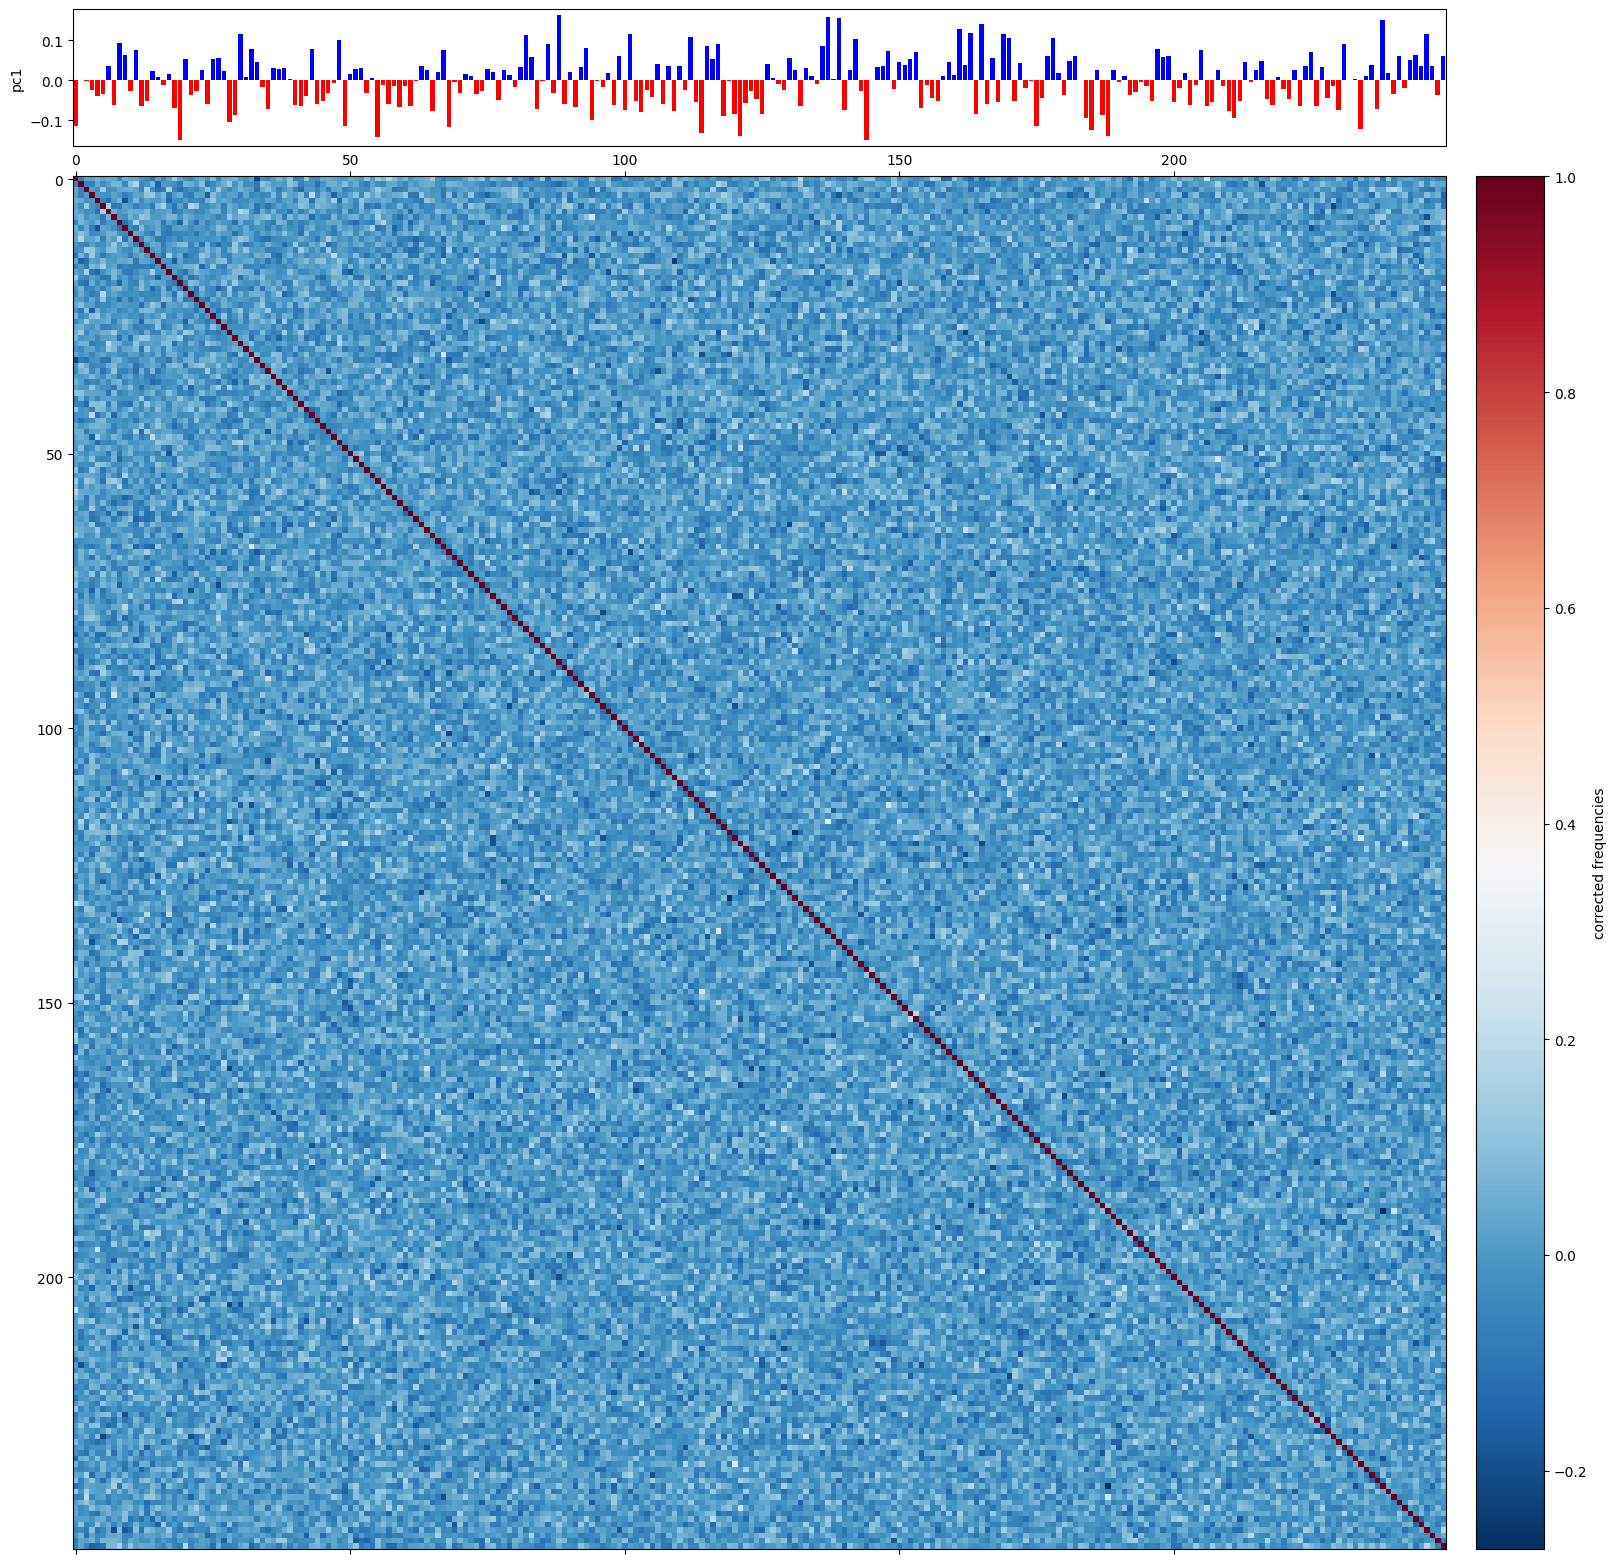

In [5]:
f, ax = plt.subplots(
    figsize=(20, 20),
)
im = ax.matshow(
    pearson_np,
    cmap='RdBu_r',
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
plt.colorbar(im, cax=cax, label='corrected frequencies')

#### Settings for pc1_np
ax1 = divider.append_axes("top", size="10%", pad=0.3, sharex=ax)
pc1_x_axis = [i for i in range(0, len(pc1_np))]
pc1_bar_color = ['b' if i > 0 else 'r' for i in pc1_np]
ax1.bar(x=pc1_x_axis, height=pc1_np, color=pc1_bar_color)
ax1.set_ylabel('pc1')
ax1.xaxis.set_visible(False)

In [6]:
base = cov_np[0].copy()

for i in range(len(cov_np)):
    tmp = cov_np[i].copy()
    base, tmp = flip_tracks(track1_np=base, track2_np=tmp)
    info = peptools.calc_similarity(base, tmp)
    print(info['similar_rate'])

1.0
0.544
0.54
0.504
0.544
0.524
0.456
0.5
0.544
0.52
0.58
0.496
0.496
0.544
0.576
0.528
0.536
0.54
0.56
0.564
0.572
0.536
0.512
0.508
0.532
0.544
0.568
0.532
0.56
0.564
0.564
0.532
0.512
0.64
0.488
0.564
0.524
0.492
0.516
0.576
0.488
0.52
0.604
0.548
0.552
0.552
0.608
0.524
0.528
0.52
0.5
0.496
0.508
0.544
0.52
0.564
0.592
0.576
0.508
0.548
0.588
0.504
0.584
0.52
0.532
0.668
0.512
0.52
0.516
0.548
0.524
0.572
0.532
0.62
0.548
0.464
0.596
0.52
0.496
0.556
0.604
0.524
0.508
0.628
0.592
0.596
0.568
0.464
0.58
0.536
0.552
0.484
0.564
0.504
0.588
0.544
0.516
0.524
0.536
0.596
0.52
0.536
0.528
0.484
0.476
0.56
0.552
0.588
0.552
0.58
0.54
0.516
0.548
0.532
0.528
0.6
0.504
0.52
0.544
0.532
0.532
0.576
0.516
0.512
0.472
0.612
0.496
0.572
0.5
0.536
0.616
0.516
0.636
0.552
0.548
0.52
0.488
0.568
0.512
0.552
0.524
0.556
0.58
0.568
0.688
0.564
0.512
0.5
0.524
0.552
0.52
0.492
0.604
0.552
0.572
0.524
0.628
0.604
0.552
0.576
0.564
0.5
0.516
0.664
0.64
0.604
0.52
0.568
0.524
0.508
0.636
0.528
0.516
0